In [1]:
import numpy as np
import pandas as pd

In [31]:
loan_data = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_17728\2133967588.py:1: DtypeWarning: Columns (21,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan_data_2007_2014_preprocessed.csv')


In [32]:
loan_data_defaults = loan_data[loan_data['loan_status'].isin(['Charged Off',
                                                             'Does not meet the credit policy. Status:Charged Off'])]

In [33]:
pd.options.display.max_rows = None
loan_data_defaults.isnull().sum()

Unnamed: 0.1                                                           0
Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                         

In [34]:
loan_data_defaults['mths_since_last_delinq'].fillna(0,inplace=True)
loan_data_defaults['mths_since_last_record'].fillna(0,inplace=True)
loan_data_defaults.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_17728\4162628263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17728\4162628263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0,inplace=True)


Unnamed: 0.1                                                           0
Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                         

In [48]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt'] 

C:\Users\HP\AppData\Local\Temp\ipykernel_17728\1702651407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']


In [49]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']>1,1,loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']<0,0,loan_data_defaults['recovery_rate'])

C:\Users\HP\AppData\Local\Temp\ipykernel_17728\2694487119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']>1,1,loan_data_defaults['recovery_rate'])
C:\Users\HP\AppData\Local\Temp\ipykernel_17728\2694487119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']<0,0,loan_data_defaults['recovery_rate'])


In [50]:
loan_data_defaults['ccf'] = (loan_data_defaults['funded_amnt']-loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']

C:\Users\HP\AppData\Local\Temp\ipykernel_17728\3648314251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['ccf'] = (loan_data_defaults['funded_amnt']-loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate']==0,0,1)

C:\Users\HP\AppData\Local\Temp\ipykernel_17728\4022416701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate']==0,0,1)


In [40]:
from sklearn.model_selection import train_test_split

In [53]:
lgd_inputs_stage1_train, lgd_inputs_stage1_test, lgd_targets_stage1_train, lgd_targets_stage1_test = train_test_split(loan_data_defaults.drop(['good_bad','recovery_rate','recovery_rate_0_1'],axis=1),
                                                                                                                      loan_data_defaults['recovery_rate_0_1'],test_size = 0.2,random_state = 42)

In [54]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [55]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [56]:
lgd_inputs_stage1_train = lgd_inputs_stage1_train[features_all]
lgd_inputs_stage1_train = lgd_inputs_stage1_train.drop(features_reference_cat, axis = 1)

In [57]:
from sklearn import linear_model
from sklearn import metrics
import scipy.stats as stat

class logit:
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values        

In [58]:
reg_lgd_stage1 = logit()
reg_lgd_stage1.fit(lgd_inputs_stage1_train,lgd_targets_stage1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
feature_name = lgd_inputs_stage1_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'],data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_stage1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg_lgd_stage1.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = np.append(np.nan,reg_lgd_stage1.p_values)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-9.500586e-05,NaN
1,grade:A,-1.153956e-05,9.998900e-01
2,grade:B,-7.011139e-05,9.991751e-01
3,grade:C,-1.354463e-04,9.983525e-01
4,grade:D,1.952777e-05,9.997721e-01
5,grade:E,1.491704e-05,9.998422e-01
6,grade:F,7.539883e-05,9.993061e-01
7,home_ownership:MORTGAGE,-3.581581e-05,9.988686e-01
8,home_ownership:NONE,9.159892e-07,9.999991e-01
9,home_ownership:OTHER,5.534117e-07,9.999988e-01


In [61]:
lgd_inputs_stage1_test = lgd_inputs_stage1_test[features_all]
lgd_inputs_stage1_test = lgd_inputs_stage1_test.drop(features_reference_cat, axis = 1)

In [62]:
y_hat_test_stage1= reg_lgd_stage1.model.predict(lgd_inputs_stage1_test)

In [65]:
y_hat_test_stage1_proba = reg_lgd_stage1.model.predict_proba(lgd_inputs_stage1_test)[:][:,1]

In [66]:
y_hat_test_stage1_proba

array([0.5909808 , 0.60746461, 0.47219084, ..., 0.51247991, 0.57821319,
       0.53252967])

In [70]:
lgd_targets_stage1_test_temp = lgd_targets_stage1_test
lgd_targets_stage1_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([lgd_targets_stage1_test_temp, pd.DataFrame(y_hat_test_stage1_proba)], axis = 1)
df_actual_predicted_probs.columns = ['lgd_targets_stage1_test', 'y_hat_test_proba_lgd_stage1']
df_actual_predicted_probs.index = lgd_inputs_stage1_test.index

In [71]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage1'] > tr, 1, 0)
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'], rownames = ['Actual'], colnames = ['Predicted'])
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6022201665124884

0.6492684454907347

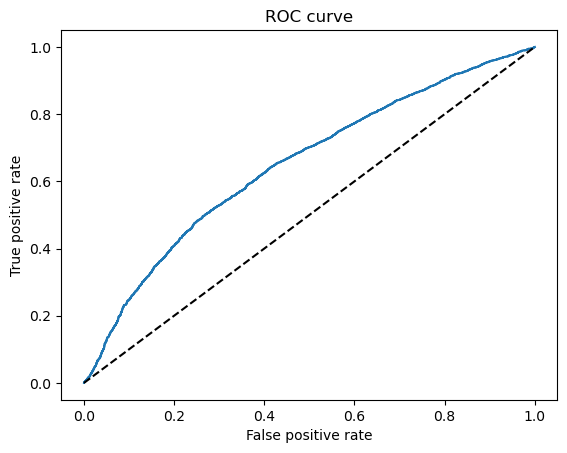

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage1'])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage1'])
AUROC

In [73]:
import pickle
pickle.dump(reg_lgd_stage1, open('lgd_model_stage1.sav', 'wb'))

In [85]:
lgd_stage2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]
lgd_inputs_stage2_train, lgd_inputs_stage2_test, lgd_targets_stage2_train, lgd_targets_stage2_test = train_test_split(lgd_stage2_data.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'ccf'], axis = 1), lgd_stage2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [86]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
import scipy.stats as stat

class Linear_Regression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [88]:
lgd_inputs_stage2_train = lgd_inputs_stage2_train[features_all]
lgd_inputs_stage2_train = lgd_inputs_stage2_train.drop(features_reference_cat, axis = 1)

In [94]:
reg_lgd_stage2 = Linear_Regression()

In [92]:
reg_lgd_stage2.fit(lgd_inputs_stage2_train, lgd_targets_stage2_train)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [95]:
feature_name = lgd_inputs_stage2_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_stage2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_stage2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

AttributeError: 'Linear_Regression' object has no attribute 'coef_'

In [96]:
lgd_inputs_stage2_test = lgd_inputs_stage2_test[features_all]
lgd_inputs_stage2_test = lgd_inputs_stage2_test.drop(features_reference_cat, axis = 1)
lgd_inputs_stage2_test.columns.values
y_hat_test_lgd_stage2 = reg_lgd_stage2.predict(lgd_inputs_stage2_test)
lgd_targets_stage2_test_temp = lgd_targets_stage2_test
lgd_targets_stage2_test_temp = lgd_targets_stage2_test_temp.reset_index(drop = True)
pd.concat([lgd_targets_stage2_test_temp, pd.DataFrame(y_hat_test_lgd_stage2)], axis = 1).corr()
y_hat_test_lgd_stage2_all = reg_lgd_stage2.predict(lgd_inputs_stage1_test)

y_hat_test_lgd = y_hat_test_lgd_stage1 * y_hat_test_lgd_stage2_all
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

NotFittedError: This Linear_Regression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [98]:
#EAD Model
ead_data = loan_data_defaults
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(ead_data.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'ccf'], axis = 1), ead_data['ccf'], test_size = 0.2, random_state = 42)

In [99]:
ead_inputs_train = ead_inputs_train[features_all]
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

reg_ead = Linear_Regression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

feature_name = ead_inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

ead_inputs_test = ead_inputs_test[features_all]
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)
ead_inputs_test.columns.values
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
ead_targets_test_temp = ead_targets_test
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()
y_hat_test_ead_all = reg_ead.predict(ead_inputs_test)

TypeError: super(type, obj): obj must be an instance or subtype of type